# Analysis of Recent Research Trends

DSEP Mapping Research Team, UC Berkeley

Berkeley Institute for Data Science

Zhongling Jiang, Vinitra Swamy

The research_grant_history dataset contains historical grants information of all Berkeley research taken place from 1987 to 2016. The information includes activity type, sponsor class, fund amount, department, project information, PI, etc. Our goal is to visualize the trend of recent ten years' research. The component that we look at includes:

- which department gets most funding? what projects do they conduct?
- what are the largest funding source of these research? 
- which type of research gets most funding?
- who are supervising funds (popular PIs)


In [3]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

from datascience import *
import numpy as np

import locale
import re
import csv

### By department data

Based on previous work on data cleaning and exploration, we create two datasets: by_dept_funding.csv and by_dept_activity.csv. Both datasets group data by department and respectively show funding info. and reseach type info. for each department. They are sorted by grant amount.

In [4]:
by_dept_funding = pd.read_csv('by_dept_funding.csv')
by_dept_activity = pd.read_csv('by_dept_activity.csv')
by_dept_funding.head(3)

,Dept/Division,Grant Amount,Federal,State of California,Non Profit,University of California,Other
0,ERSO Engineering Research Support Organization,"$1,024,039,099",3808,192,614,344,1127
1,SSL Space Sciences Lab,"$551,464,465",1969,0,105,2,35
2,MCB Molecular & Cell Biology,"$438,743,186",1404,14,1262,44,155


In [5]:
by_dept_activity.head(3)

,Dept/Division,Grant Amount,Applied Research,Basic Research,Training,Instruction,Services,Other,Total
0,ERSO Engineering Research Support Organization,"$1,024,039,099",282,5242,26,8,6,521,6085
1,SSL Space Sciences Lab,"$551,464,465",108,1769,2,0,110,122,2111
2,MCB Molecular & Cell Biology,"$438,743,186",24,2748,62,0,1,44,2879


In [6]:
## Add total number of sponsors and research
by_dept_funding['num_of_sponsors'] = by_dept_funding['Federal'] + by_dept_funding['State of California'] + by_dept_funding['Non Profit'] + by_dept_funding['University of California'] + by_dept_funding['Other']
by_dept_funding['num_of_research'] = by_dept_activity['Total']
by_dept_funding.head(4)

,Dept/Division,Grant Amount,Federal,State of California,Non Profit,University of California,Other,num_of_sponsors,num_of_research
0,ERSO Engineering Research Support Organization,"$1,024,039,099",3808,192,614,344,1127,6085,6085
1,SSL Space Sciences Lab,"$551,464,465",1969,0,105,2,35,2111,2111
2,MCB Molecular & Cell Biology,"$438,743,186",1404,14,1262,44,155,2879,2879
3,The California Institute for Quantitative Bios...,"$371,026,612",1388,25,476,41,263,2193,2193


### Bubble chart

We create the bubble chart using plot.ly. Each bubble represents a department, the size represents the number of research from that department, and the distance from origin represents the amount of fundings.

The top four organizations that recieve most fundings: ERSO Engineering, SSL Space Lab, MCB Molecular & Cell, and The California Institute for Qualitative Biosciences.

The top four organizations that produces most research: ERSO Engineering, MCB Molecular & Cell, Graduate division Dean, and The California Institute for Qualitative Biosciences.

In [7]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd

cf.set_config_file(offline=False, world_readable=True, theme='pearl')

by_dept_funding.iplot(kind='bubble', x='Grant Amount', y='num_of_research', size = 'num_of_sponsors',text='Dept/Division',
             xTitle='Funding Recieved', yTitle='Number of Research',
             filename='simple-bubble-chart2')

ImportError: No module named 'plotly'

### Recent activity

We are curious to know which departments are most active recently (in past 10 years) by producing high quantity of research. We pick top four from above.

In [8]:
cleaned_research = pd.read_csv('cleaned_research_spo_data.csv')
recent_data = cleaned_research[cleaned_research['Year'] > 2006] 
# Find number of research
grouped = recent_data.groupby([recent_data['Department'], recent_data['Year']]).size()

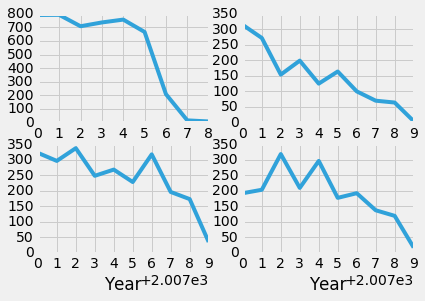

In [9]:
plt.figure()
plt.subplot(2,2,1)
grouped['ERSO Engineering Research Support Organization'].plot.line()
plt.subplot(2,2,2)
grouped['SSL Space Sciences Lab'].plot.line()
plt.subplot(2,2,3)
grouped['MCB Molecular & Cell Biology'].plot.line()
plt.subplot(2,2,4)
grouped['The California Institute for Quantitative Biosciences (QB3)'].plot.line()
plt.show()

### Type of research
The number of different types of research over time. Basic research are most popular fund recievers in recent 10- 15 years.

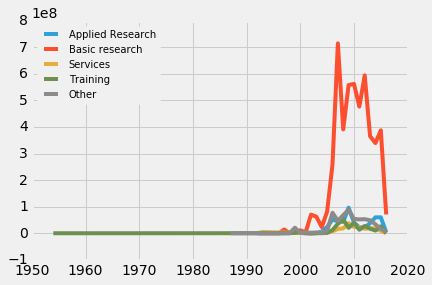

In [10]:
cleaned_research = pd.read_csv('cleaned_research_spo_data.csv')
a = cleaned_research['Grant Amount'].groupby([cleaned_research['Activity Type'], cleaned_research['Year']]).sum()

plt.figure()
plt.plot(a['Applied research'], label = 'Applied Research')
plt.plot(a['Basic research'], label = 'Basic research')
plt.plot(a['Services'], label = 'Services')
plt.plot(a['Training'], label = 'Training')
plt.plot(a['Other'], label = 'Other')
plt.legend(loc=2,prop={'size':10})
plt.show()

## Visualization with Ipython widget 
### Funding source & reserach type analysis 
With the drop-down list, we can visualize the funding source by department. For example, federal funding accounts for the greatest percentage in funding ERSO Engineering. Meanwhile, onw subplot shows which type of research is more hearvily funded in department.


In [80]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

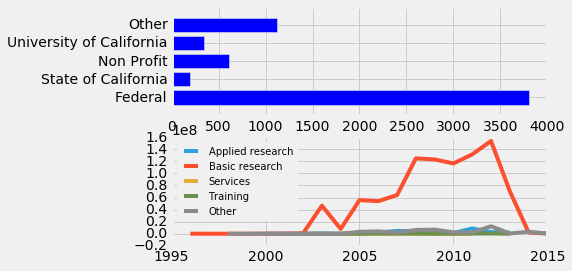

In [81]:
# ERSO Engineering Research Lab
# funding source count
# apply ipywidget
grant_data = pd.read_csv('grant_data.csv')

def plot_funding_and_research_type(dept):
    x = by_dept_funding.loc[by_dept_funding['Dept/Division'] == dept,['Federal', 'State of California', 'Non Profit', 'University of California', 'Other']].values.flatten().tolist()
    y = [1,2,3,4,5] 

    
    z = cleaned_research.loc[cleaned_research['Department'] == dept, ['Activity Type','Grant Amount', 'Department','Year']]
    a = z['Grant Amount'].groupby([z['Activity Type'], z['Year']]).sum()
    
    plt.figure()
    plt.subplot(2,1,1)
    LABELS = ['Federal', 'State of California', 'Non Profit', 'University of California', 'Other'] 
    plt.barh(y, x, align = 'center')
    plt.yticks(y, LABELS)

    plt.subplot(2,1,2)
    types_of_research = ['Applied research','Basic research', 'Services', 'Training', 'Other']
    
    for research_type in types_of_research:
        plt.plot(a[research_type], label = research_type)
    plt.legend(loc=2,prop={'size':10})
    plt.show()

plot_funding_and_research_type('ERSO Engineering Research Support Organization')

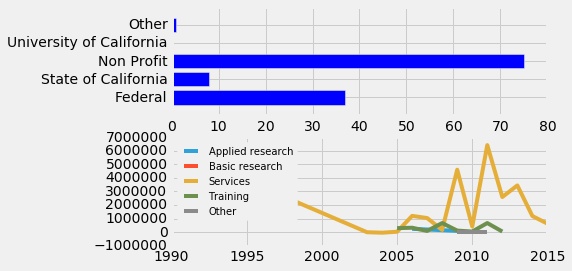

<function __main__.plot_funding_and_research_type>

In [82]:
unique_divisions = list(set(by_dept_funding['Dept/Division']))[1:]
interact(plot_funding_and_research_type, dept=unique_divisions)

In [38]:
by_dept_funding.head(3)

,Dept/Division,Grant Amount,Federal,State of California,Non Profit,University of California,Other,num_of_sponsors,num_of_research
0,ERSO Engineering Research Support Organization,"$1,024,039,099",3808,192,614,344,1127,6085,6085
1,SSL Space Sciences Lab,"$551,464,465",1969,0,105,2,35,2111,2111
2,MCB Molecular & Cell Biology,"$438,743,186",1404,14,1262,44,155,2879,2879


### Top funding projects 

We could also see the most popular projects i.e, the ones that recieve most fundings within each department. Further text analysis could be conducted to investigate the trend in research topics. 

In [85]:
# what ERSO project recieves top funding (or in each department)

clean_grant = pd.read_csv('cleaned_research_spo_data.csv') # the dataset has been sorted by grant amount
def top_project(data, dept, n):
    by_dept = data.loc[data['Dept/Division'] == dept, ] 
    return by_dept[['Department', 'Amount', 'Title', 'Activity Type','Project Begin Date', 'Project End Date']].head(n)

# top_project(clean_grant, 'ERSO Engineering Research Support Organization', 10)

interact(top_project, data=fixed(clean_grant), dept=unique_divisions, n=widgets.IntSlider(min=0, max=50, step=5, value=10))

,Department,Amount,Title,Activity Type,Project Begin Date,Project End Date
245,Center for Educational Partnerships,"$3,321,578",TRIO-Talent Search,Services,9/1/2011,8/31/2016
257,Center for Educational Partnerships,"$3,254,050","University of California, Berkeley Upward Boun...",Services,6/1/2013,5/31/2018
340,Center for Educational Partnerships,"$2,616,100",Upward Bound Program (84.047A) Regular Upward ...,Services,6/1/2009,5/31/2013
646,Center for Educational Partnerships,"$1,770,070",CEP - Upward Bound Math and Science 2012-17,Services,11/1/2012,10/31/2017
705,Center for Educational Partnerships,"$1,665,000",Fisher Counseling Initiative,Services,2/1/2009,7/31/2011
940,Center for Educational Partnerships,"$1,416,164",Upward Bound Math and Science (UBMS) Program (...,Instruction,11/1/2007,10/31/2011
1077,Center for Educational Partnerships,"$1,259,564",Berkeley Bridges to the Baccalaureate,Services,4/1/2011,3/31/2016
1332,Center for Educational Partnerships,"$1,043,316",National College Access Initative; Destination...,Services,5/1/2007,5/31/2011
1417,Center for Educational Partnerships,"$1,000,000",Community College Transfer Initiative,Services,5/1/2006,6/30/2010
1604,Center for Educational Partnerships,"$858,435",The Puente Project CA Community College Progra...,Services,7/1/2014,6/30/2015


<function __main__.top_project>